In [1]:
options(warn=-1)
library(rmarkdown)
library(openxlsx)
library(readr)
library(moments)
library(knitr)
library(plm)
library(xtable)
library(readxl)
library(printr)
library(effects)
library(car)
library(AER)
library(broom)
library(tseries)
library(Metrics)
library(see)
library(performance)
library(stats)
library(lmtest)
library(stargazer)
library(ggplot2)
library(bookdown)
library(olsrr)
library(systemfit)
library(gplots)

Registered S3 method overwritten by 'printr':
  method                from     
  knit_print.data.frame rmarkdown

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘performance’


The following objects are masked from ‘package:Metrics’:

    mae, mse, rmse


The following object is masked from ‘package:xtable’:

    display



Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘olsrr’


The following object is masked f

In [2]:
DataFrame_1 <- read_excel("/Users/alexandertrejo/Documents/Locus Analytica/Desaparecidos/Alex/desaparecidos/Alex Bd/Project/Predicción/BDDESAPCDMX.xlsx")
DataFrame_1 

Sexo,Edad,Fecha.de.desaparicion,Municipio.Alcadia.de.la.desaparicion,Nacionalidad,Estatus.DESAPARECIDO,Fecha.de.desaparicion_real,cve_Estado_anio,Año de inicio,Municipio,Presidente Municipal,Partido,Latitud,Longitud
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
HOMBRE,73,2009,Gustavo A. Madero,MEXICANA,DESAPARECIDA,2010,Gustavo A. Madero_2009.0,2009,Gustavo A. Madero,ING. VICTOR HUGO LOBO ROMAN,PRD,19.49392,-99.09949
HOMBRE,73,2009,Gustavo A. Madero,MEXICANA,DESAPARECIDA,2010,Gustavo A. Madero_2009.0,2009,Gustavo A. Madero,Alejandro M. Encinas Rodríguez,PRD,19.49392,-99.09949
HOMBRE,No especificado,2009,Cuajimalpa de Morelos,MEXICANA,DESAPARECIDA,2010,Cuajimalpa de Morelos_2009.0,2009,Cuajimalpa de Morelos,LIC. CARLOS ORVAÑANOS REA,PAN,19.36175,-99.29765
HOMBRE,No especificado,2009,Cuajimalpa de Morelos,MEXICANA,DESAPARECIDA,2010,Cuajimalpa de Morelos_2009.0,2009,Cuajimalpa de Morelos,Adrián Rubalcava Suárez,PRD,19.36175,-99.29765
HOMBRE,49,2009,Cuauhtémoc,MEXICANA,DESAPARECIDA,2010,Cuauhtémoc_2009.0,2009,Cuauhtémoc,LIC. AGUSTIN TORRES PEREZ,PRD,19.43263,-99.13318
HOMBRE,49,2009,Cuauhtémoc,MEXICANA,DESAPARECIDA,2010,Cuauhtémoc_2009.0,2009,Cuauhtémoc,Cuauhtémoc Cárdenas Solórzano,PRD,19.43263,-99.13318
HOMBRE,39,2009,Álvaro Obregón,MEXICANA,DESAPARECIDA,2010,Álvaro Obregón_2009.0,2009,Álvaro Obregón,LIC. EDUARDO SANTILLAN PEREZ,PRD,19.35608,-99.24801
HOMBRE,39,2009,Álvaro Obregón,MEXICANA,DESAPARECIDA,2010,Álvaro Obregón_2009.0,2009,Álvaro Obregón,Leonel Luna Estrada,PRD,19.35608,-99.24801
HOMBRE,13,2009,Álvaro Obregón,MEXICANA,DESAPARECIDA,2010,Álvaro Obregón_2009.0,2009,Álvaro Obregón,LIC. EDUARDO SANTILLAN PEREZ,PRD,19.35608,-99.24801


In [3]:
DataFrame_1$Edad[DataFrame_1$Edad == "No especificado"] <- NA
DataFrame_1$Edad<-as.integer(DataFrame_1$Edad)
tidy(DataFrame_1[c('Edad')])

column,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Edad,5712,34.51033,20.03301,30,32.51116,14,0,98,98,NA,NA,0.2650649


In [4]:
colnames(DataFrame_1)

[1] "Sexo"                                
 [2] "Edad"                                
 [3] "Fecha.de.desaparicion"               
 [4] "Municipio.Alcadia.de.la.desaparicion"
 [5] "Nacionalidad"                        
 [6] "Estatus.DESAPARECIDO"                
 [7] "Fecha.de.desaparicion_real"          
 [8] "cve_Estado_anio"                     
 [9] "Año de inicio"                       
[10] "Municipio"                           
[11] "Presidente Municipal"                
[12] "Partido"                             
[13] "Latitud"                             
[14] "Longitud"

## Modelo lineal simple

In [5]:
mod1 <- lm(Edad~Sexo, data=DataFrame_1)
smod1 <- data.frame(xtable(summary(mod1)))
smod1

,Estimate,Std..Error,t.value,Pr...t..
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),39.128750,0.3278179,119.36124,0.000000e+00
SexoMUJER,-11.644182,0.5197406,-22.40383,1.269711e-106
SexoSE DESCONOCE,2.598522,5.8005327,0.44798,6.541847e-01


In [6]:
b1 <- coef(mod1)[[1]]
b2 <- coef(mod1)[[2]]
b1
b2
#plot(DataFrame_2$Precio, DataFrame_2$metros, xlab="Precio", ylab="Metros", type = "p")
#abline(b1,b2,col="red")

[1] 39.12875

[1] -11.64418

In [7]:
smrymod1 <-summary(mod1)
print(paste("R^2 es: ",smrymod1$r.squared*100,"%"))
print(paste("R^2 ajustada es: ",smrymod1$adj.r.squared*100,"%"))

[1] "R^2 es:  8.10444678227753 %"
[1] "R^2 ajustada es:  8.07225355992065 %"


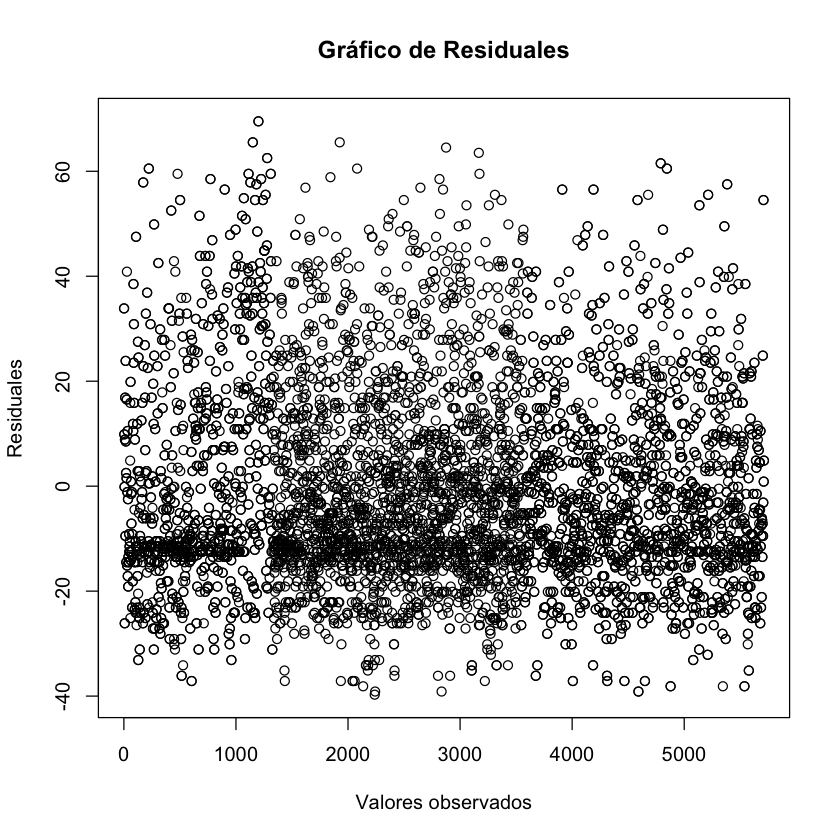

In [ ]:
plot(residuals(mod1), xlab = "Valores observados", ylab = "Residuales", main = "Gráfico de Residuales")

## Modelo regresión multiple

In [9]:
mlmultiple=lm(Edad~.,data=na.omit(DataFrame_1))
model.final=step(mlmultiple)
summary(model.final)

Start:  AIC=31379.38
Edad ~ Sexo + Fecha.de.desaparicion + Municipio.Alcadia.de.la.desaparicion + 
    Nacionalidad + Estatus.DESAPARECIDO + Fecha.de.desaparicion_real + 
    cve_Estado_anio + `Año de inicio` + Municipio + `Presidente Municipal` + 
    Partido + Latitud + Longitud


Step:  AIC=31379.38
Edad ~ Sexo + Fecha.de.desaparicion + Municipio.Alcadia.de.la.desaparicion + 
    Nacionalidad + Estatus.DESAPARECIDO + Fecha.de.desaparicion_real + 
    cve_Estado_anio + `Año de inicio` + Municipio + `Presidente Municipal` + 
    Partido + Latitud


Step:  AIC=31379.38
Edad ~ Sexo + Fecha.de.desaparicion + Municipio.Alcadia.de.la.desaparicion + 
    Nacionalidad + Estatus.DESAPARECIDO + Fecha.de.desaparicion_real + 
    cve_Estado_anio + `Año de inicio` + Municipio + `Presidente Municipal` + 
    Partido


Step:  AIC=31379.38
Edad ~ Sexo + Fecha.de.desaparicion + Municipio.Alcadia.de.la.desaparicion + 
    Nacionalidad + Estatus.DESAPARECIDO + Fecha.de.desaparicion_real + 
    cve_Esta


Call:
lm(formula = Edad ~ Sexo + Nacionalidad + Estatus.DESAPARECIDO + 
    Fecha.de.desaparicion_real + cve_Estado_anio, data = na.omit(DataFrame_1))

Residuals:
    Min      1Q  Median      3Q     Max 
-50.369 -12.928  -4.117  11.285  66.113 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 1297.7060   810.3897   1.601
SexoMUJER                                    -11.6984     0.5452 -21.456
SexoSE DESCONOCE                              13.1697    13.4103   0.982
NacionalidadESTADOUNIDENSE                   -29.5720    19.6557  -1.504
NacionalidadEXTRANJERA                       -38.2091    13.8841  -2.752
NacionalidadHOLANDESA                        -46.3834    19.2701  -2.407
NacionalidadHONDUREÑA                        -51.3834    19.2701  -2.666
NacionalidadMEXICANA                         -36.4863    13.7233  -2.659
NacionalidadNICARAGUENSE                       1.5835    19.3354   0.082
Nacionali

In [10]:
mlmultiple1=lm(formula = Edad ~ Sexo + Nacionalidad + Estatus.DESAPARECIDO + 
    Fecha.de.desaparicion_real + cve_Estado_anio, data = na.omit(DataFrame_1))
model.final1=step(mlmultiple1)
summary(model.final1)

Start:  AIC=31263.38
Edad ~ Sexo + Nacionalidad + Estatus.DESAPARECIDO + Fecha.de.desaparicion_real + 
    cve_Estado_anio

                             Df Sum of Sq     RSS   AIC
<none>                                    1854917 31263
- Fecha.de.desaparicion_real  1       815 1855731 31264
- Estatus.DESAPARECIDO        1       965 1855882 31264
- Nacionalidad                9      7794 1862711 31268
- cve_Estado_anio            87    102921 1957838 31376
- Sexo                        2    164735 2019652 31711



Call:
lm(formula = Edad ~ Sexo + Nacionalidad + Estatus.DESAPARECIDO + 
    Fecha.de.desaparicion_real + cve_Estado_anio, data = na.omit(DataFrame_1))

Residuals:
    Min      1Q  Median      3Q     Max 
-50.369 -12.928  -4.117  11.285  66.113 

Coefficients:
                                             Estimate Std. Error t value
(Intercept)                                 1297.7060   810.3897   1.601
SexoMUJER                                    -11.6984     0.5452 -21.456
SexoSE DESCONOCE                              13.1697    13.4103   0.982
NacionalidadESTADOUNIDENSE                   -29.5720    19.6557  -1.504
NacionalidadEXTRANJERA                       -38.2091    13.8841  -2.752
NacionalidadHOLANDESA                        -46.3834    19.2701  -2.407
NacionalidadHONDUREÑA                        -51.3834    19.2701  -2.666
NacionalidadMEXICANA                         -36.4863    13.7233  -2.659
NacionalidadNICARAGUENSE                       1.5835    19.3354   0.082
Nacionali

## Modelo 2

In [11]:
DataFrame_2 <- read_excel('/Users/alexandertrejo/Documents/Locus Analytica/Desaparecidos/Alex/desaparecidos/Alex Bd/Project/Predicción/DF2.xlsx')
head(DataFrame_2)

Estatus.DESAPARECIDO,Sexo,Edad,Municipio,Fecha.de.desaparicion_real,Partido
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,73,0,2010,0
0,0,73,0,2010,0
0,0,49,2,2010,0
0,0,49,2,2010,0
0,0,39,3,2010,0
0,0,39,3,2010,0


In [12]:
mod2 <- lm(Edad~factor(Sexo), data=DataFrame_2)
smod2 <- data.frame(xtable(summary(mod2)))
smrymod1 <-summary(mod2)
print(paste("R^2 es: ",smrymod1$r.squared*100,"%"))
print(paste("R^2 ajustada es: ",smrymod1$adj.r.squared*100,"%"))

[1] "R^2 es:  8.10245163454097 %"
[1] "R^2 ajustada es:  8.08632642865126 %"


In [13]:
mlmultiple2=lm(Estatus.DESAPARECIDO~.,data=na.omit(DataFrame_2))
model.final2=step(mlmultiple2)
summary(model.final2)

Start:  AIC=-9582.28
Estatus.DESAPARECIDO ~ Sexo + Edad + Municipio + Fecha.de.desaparicion_real + 
    Partido

                             Df Sum of Sq    RSS     AIC
- Edad                        1      0.01 1059.4 -9584.2
<none>                                    1059.4 -9582.3
- Fecha.de.desaparicion_real  1      0.58 1060.0 -9581.1
- Sexo                        1      4.56 1064.0 -9559.8
- Municipio                   1      7.51 1066.9 -9544.0
- Partido                     1    354.46 1413.9 -7938.9

Step:  AIC=-9584.24
Estatus.DESAPARECIDO ~ Sexo + Municipio + Fecha.de.desaparicion_real + 
    Partido

                             Df Sum of Sq    RSS     AIC
<none>                                    1059.4 -9584.2
- Fecha.de.desaparicion_real  1      0.58 1060.0 -9583.1
- Sexo                        1      5.09 1064.5 -9558.9
- Municipio                   1      7.52 1067.0 -9545.9
- Partido                     1    356.22 1415.7 -7933.8



Call:
lm(formula = Estatus.DESAPARECIDO ~ Sexo + Municipio + Fecha.de.desaparicion_real + 
    Partido, data = na.omit(DataFrame_2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97928 -0.29221 -0.02877  0.34407  0.91742 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -7.049e-02  5.792e-02  -1.217   0.2236    
Sexo                        6.112e-02  1.168e-02   5.233 1.73e-07 ***
Municipio                   7.666e-03  1.206e-03   6.359 2.19e-10 ***
Fecha.de.desaparicion_real  4.931e-05  2.785e-05   1.771   0.0767 .  
Partido                     4.934e-02  1.127e-03  43.763  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4313 on 5696 degrees of freedom
Multiple R-squared:  0.2562,	Adjusted R-squared:  0.2557 
F-statistic: 490.5 on 4 and 5696 DF,  p-value: < 2.2e-16


In [14]:
mod2 <- lm(formula = Estatus.DESAPARECIDO ~ factor(Sexo) + factor(Municipio) + Fecha.de.desaparicion_real + factor(Partido), data = na.omit(DataFrame_2))
smod2 <- data.frame(xtable(summary(mod2)))
smrymod1 <-summary(mod2)
print(paste("R^2 es: ",smrymod1$r.squared*100,"%"))
print(paste("R^2 ajustada es: ",smrymod1$adj.r.squared*100,"%"))

[1] "R^2 es:  32.9996629991689 %"
[1] "R^2 ajustada es:  32.6095075163689 %"


### Datos panel

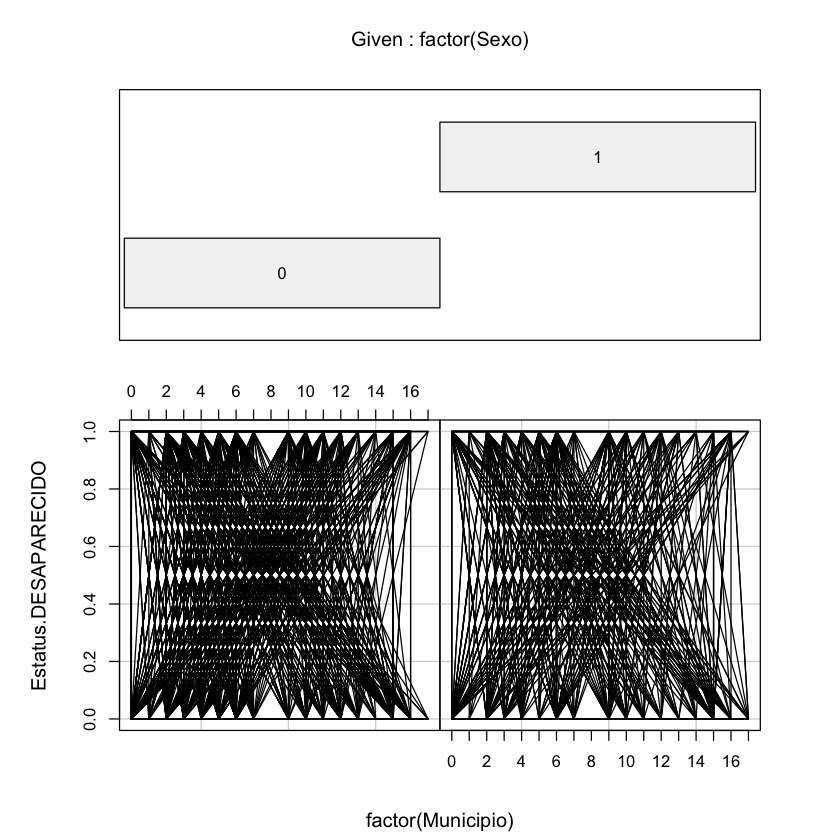

In [15]:
coplot(Estatus.DESAPARECIDO ~ factor(Municipio)|factor(Sexo), type="l", data=DataFrame_2)

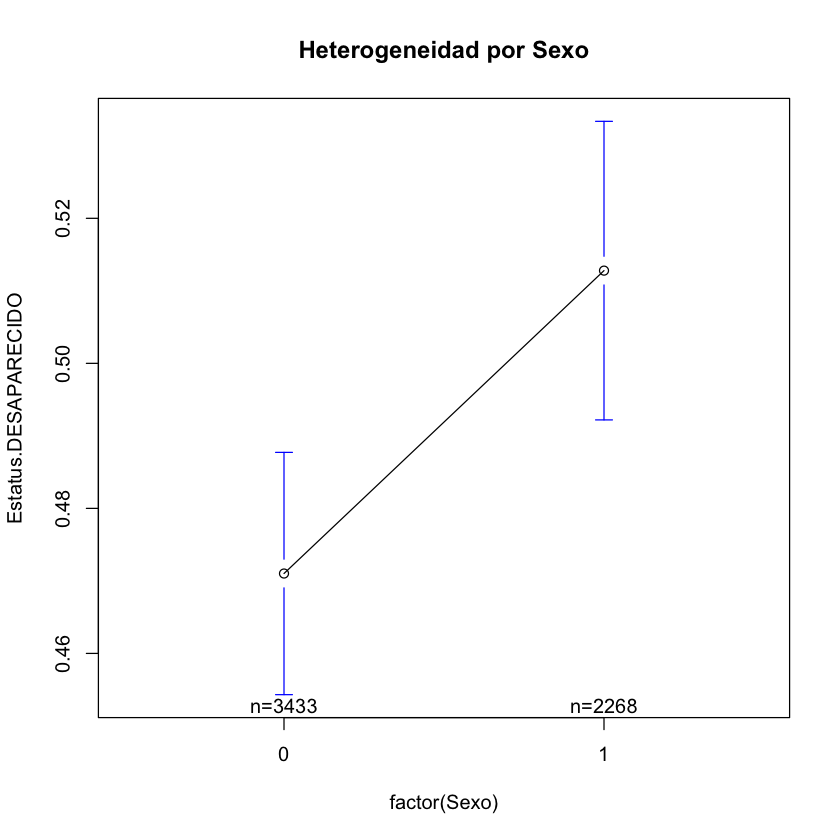

In [16]:
plotmeans(Estatus.DESAPARECIDO ~ factor(Sexo), main="Heterogeneidad por Sexo", data=DataFrame_2)

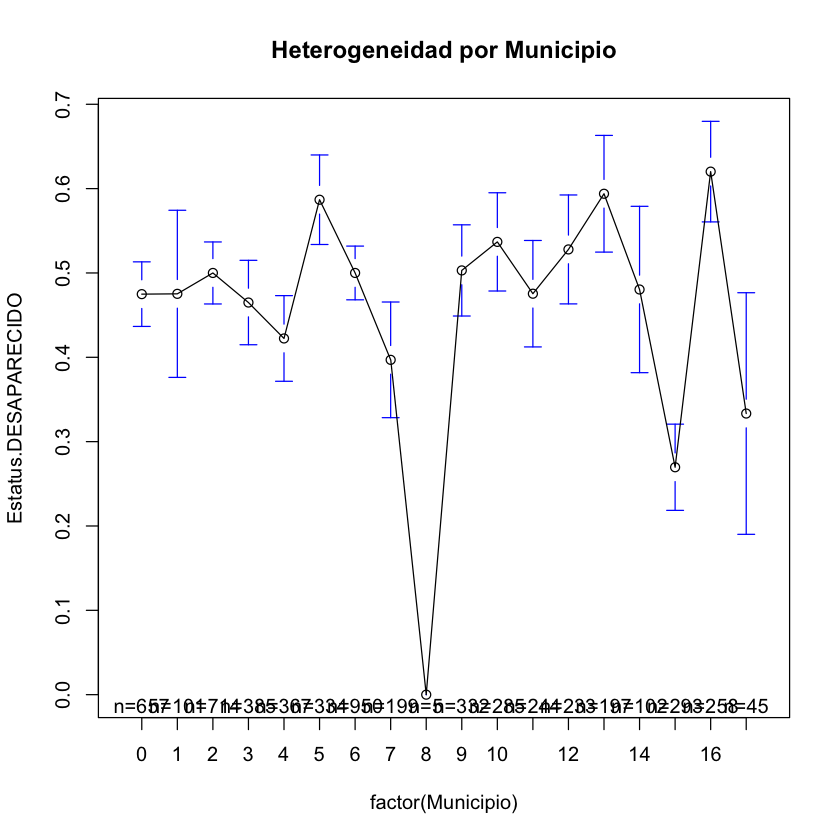

In [17]:
plotmeans(Estatus.DESAPARECIDO ~ factor(Municipio), main="Heterogeneidad por Municipio", data=DataFrame_2)

In [18]:
mod1EFIJOSDummy = lm(Estatus.DESAPARECIDO~factor(Sexo)+factor(Municipio)-1,DataFrame_2)
mod1EFIJOSDummy


Call:
lm(formula = Estatus.DESAPARECIDO ~ factor(Sexo) + factor(Municipio) - 
    1, data = DataFrame_2)

Coefficients:
      factor(Sexo)0        factor(Sexo)1   factor(Municipio)1  
           0.459579             0.497386             0.002567  
 factor(Municipio)2   factor(Municipio)3   factor(Municipio)4  
           0.026760            -0.009276            -0.050216  
 factor(Municipio)5   factor(Municipio)6   factor(Municipio)7  
           0.110495             0.025259            -0.079123  
 factor(Municipio)8   factor(Municipio)9  factor(Municipio)10  
          -0.467140             0.024644             0.061079  
factor(Municipio)11  factor(Municipio)12  factor(Municipio)13  
           0.003280             0.053065             0.118593  
factor(Municipio)14  factor(Municipio)15  factor(Municipio)16  
           0.002280            -0.202729             0.146215  
factor(Municipio)17  
          -0.148090  


In [19]:
summary(mod1EFIJOSDummy)


Call:
lm(formula = Estatus.DESAPARECIDO ~ factor(Sexo) + factor(Municipio) - 
    1, data = DataFrame_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6436 -0.4863 -0.2569  0.5026  0.7431 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
factor(Sexo)0        0.459579   0.020058  22.912  < 2e-16 ***
factor(Sexo)1        0.497386   0.020898  23.801  < 2e-16 ***
factor(Municipio)1   0.002567   0.052892   0.049 0.961291    
factor(Municipio)2   0.026760   0.026757   1.000 0.317310    
factor(Municipio)3  -0.009276   0.031760  -0.292 0.770258    
factor(Municipio)4  -0.050216   0.032257  -1.557 0.119593    
factor(Municipio)5   0.110495   0.033257   3.322 0.000898 ***
factor(Municipio)6   0.025259   0.025108   1.006 0.314466    
factor(Municipio)7  -0.079123   0.040041  -1.976 0.048199 *  
factor(Municipio)8  -0.467140   0.222150  -2.103 0.035526 *  
factor(Municipio)9   0.024644   0.033343   0.739 0.459875    
factor(Municipio)10  0.061079   0.035099 

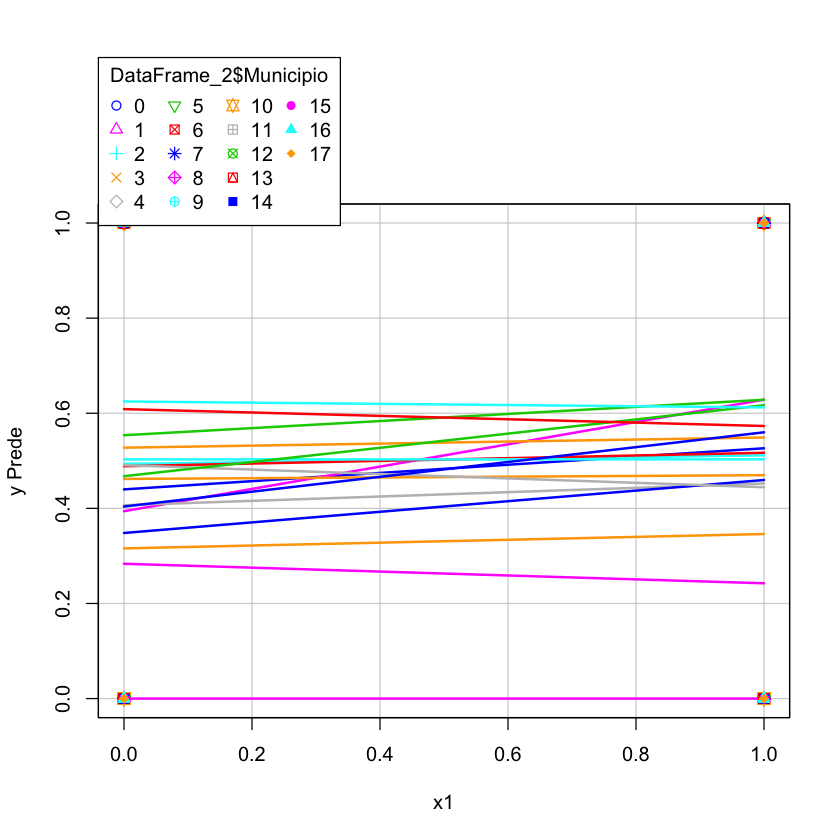

In [20]:
ypreEF=mod1EFIJOSDummy$fitted.values
scatterplot(DataFrame_2$Estatus.DESAPARECIDO~DataFrame_2$Sexo|DataFrame_2$Municipio, boxplots=FALSE,smooth=FALSE, xlab
="x1", ylab="y Prede")

In [21]:
fijoun<- plm(Estatus.DESAPARECIDO~Sexo,data=DataFrame_2,index=c("Sexo","Municipio"),model="within")

ERROR: Error in plm.fit(data, model, effect, random.method, random.models, random.dfcor, : empty model


In [ ]:
summary(fijoun)

In [ ]:
aleatorioun<- plm(Estatus.DESAPARECIDO~Sexo,data=DataFrame_2,index=c("Sexo","Municipio"),model="random")

In [ ]:
summary(aleatorioun)

In [ ]:
phtest(fijoun,aleatorioun)

In [ ]:
#fijo<- plm(preciocondesc~Precio+Vendidos+Cantidad_de_camaras_traseras+Capacidad_de_la_bateria+as.factor(Reacondic
#ionado)+Vendidos+as.factor(Con_NFC)+as.factor(Con_carga_inalambrica)+as.factor(Con_carga_rapida),data=DataFrame_
#1,index=c("Color","Fecha"),model="within")

In [ ]:
#aleatorio <- plm(preciocondesc~Precio+Vendidos+Cantidad_de_camaras_traseras+Capacidad_de_la_bateria+as.factor(Rea
#condicionado)+Vendidos+as.factor(Con_NFC)+as.factor(Con_carga_inalambrica)+as.factor(Con_carga_rapida),data=DataF
#rame_1,index=c("Color","Fecha"),model="random")

In [ ]:
phtest(fijo,aleatorio)

In [ ]:
summary(aleatorio)